In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

Adapted from Jose Portilla's Udemy Tensorflow class

In [4]:
df = pd.read_csv(r'C:\Users\bryan\Desktop\tensor_flow_class\TF_2_Notebooks_and_Data\DATA\RSCCASN.csv',parse_dates=True,index_col='DATE')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
RSCCASN    334 non-null int64
dtypes: int64(1)
memory usage: 5.2 KB


In [7]:
df.columns = ['Sales']

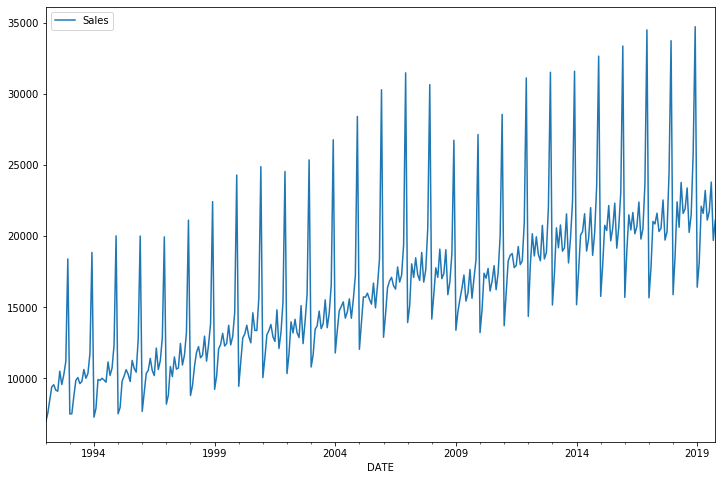

In [8]:
df.plot(figsize=(12,8))

In [9]:
len(df)

334

In [12]:
len(df) -18

316

In [15]:
test_size = 18
test_ind = len(df) - test_size

In [16]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [20]:
scaled_train = scaler.transform(train)

In [22]:
scaled_test = scaler.transform(test)

In [23]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [25]:
length = 12
generator = TimeseriesGenerator(scaled_train,scaled_train, 
                               length=length,batch_size=1)

In [26]:
X, y = generator[0]

In [27]:
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [28]:
y

array([[0.02047633]])

In [29]:
from tensorflow.keras.models import Sequential

In [30]:
from tensorflow.keras.layers import Dense, LSTM

In [31]:
n_features = 1

In [33]:
model = Sequential()
model.add(LSTM(100, activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [39]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                                          length=length,batch_size=1)

In [40]:
model.fit_generator(generator,epochs=20,
                   validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
304/304 [==============================] - 24s 80ms/step - loss: 0.0273 - val_loss: 0.0039
Epoch 2/20
304/304 [==============================] - 24s 78ms/step - loss: 0.0186 - val_loss: 0.0026
Epoch 3/20
304/304 [==============================] - 25s 82ms/step - loss: 0.0148 - val_loss: 0.0294
Epoch 4/20
304/304 [==============================] - 26s 84ms/step - loss: 0.0093 - val_loss: 0.0023
Epoch 5/20
304/304 [==============================] - 22s 73ms/step - loss: 0.0038 - val_loss: 0.0010
Epoch 6/20
304/304 [==============================] - 24s 78ms/step - loss: 0.0032 - val_loss: 0.0103
Epoch 7/20
304/304 [==============================] - 26s 85ms/step - loss: 0.0020 - val_loss: 9.8509e-04
Epoch 8/20
304/304 [==============================] - 34s 111ms/step - loss: 0.0015 - val_loss: 4.0064e-04
Epoch 9/20
304/304 [==============================] - 30s 98ms/step - loss: 0.0016 - val_loss: 5.1404e-04
Epoch 10/20
304/304 [==============================] - 27s 90ms/step 

In [41]:
losses = pd.DataFrame(model.history.history)

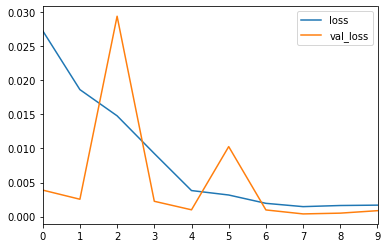

In [42]:
losses.plot()

In [48]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [49]:
true_predictions = scaler.inverse_transform(test_predictions)

In [51]:
test['Predictions'] = true_predictions

C:\Users\bryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,21843.920838
2018-06-01,21589,20825.920708
2018-07-01,21919,21036.773987
2018-08-01,23381,22743.115706
2018-09-01,20260,20530.798846
2018-10-01,21473,21077.134777
2018-11-01,25831,24767.815800
2018-12-01,34706,34016.527661
2019-01-01,16410,17184.499583


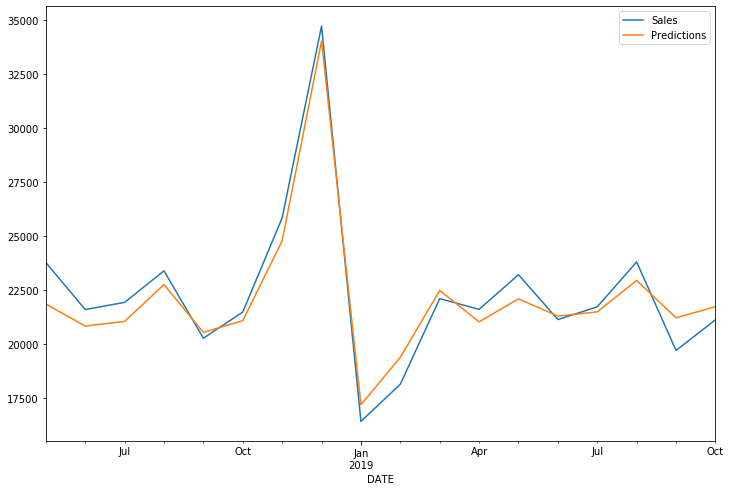

In [53]:
test.plot(figsize=(12,8))

In [54]:
full_scaler = MinMaxScaler()

In [55]:
scaled_full_data = full_scaler.fit_transform(df)

In [72]:
length = 12

In [73]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data,
                                length=length, batch_size=1)

In [74]:
model = Sequential()
model.add(LSTM(100, activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.fit_generator(generator,epochs=8)

Epoch 1/8
322/322 [==============================] - 23s 73ms/step - loss: 0.0237
Epoch 2/8
322/322 [==============================] - 25s 76ms/step - loss: 0.0162
Epoch 3/8
322/322 [==============================] - 26s 80ms/step - loss: 0.0114
Epoch 4/8
322/322 [==============================] - 26s 80ms/step - loss: 0.0051 0s - los
Epoch 5/8
322/322 [==============================] - 28s 87ms/step - loss: 0.0033
Epoch 6/8
322/322 [==============================] - 26s 81ms/step - loss: 0.0023
Epoch 7/8
322/322 [==============================] - 24s 76ms/step - loss: 0.0014
Epoch 8/8
322/322 [==============================] - 23s 72ms/step - loss: 0.0012


In [75]:
forecast = []

periods = 12

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [76]:
forecast = scaler.inverse_transform(forecast)

In [77]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [79]:
forecast

array([[22803.99016666],
       [21630.11076689],
       [21898.25292397],
       [23703.7891984 ],
       [21126.62205744],
       [21814.34963131],
       [25792.49949598],
       [35931.69509792],
       [17029.36895204],
       [19841.82846761],
       [23442.22717667],
       [21873.90576649]])

In [81]:
forecast_index = pd.date_range(start='2019-11-01',periods=periods,
                             freq="MS")

In [85]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
columns=['Forecast'])

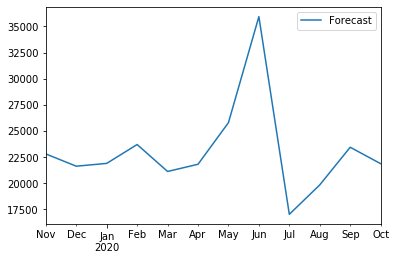

In [87]:
forecast_df.plot()

(576, 611)

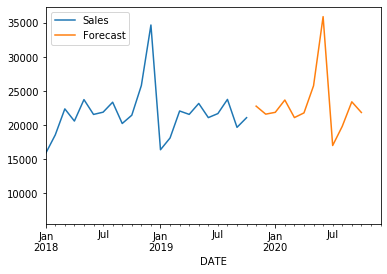

In [90]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01')